In [1]:
import os
import pymysql
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

conn = pymysql.connect(
    host="127.0.0.1",
    port=3306,
    db="ig_clone",
    user="root",
    password="abcd1234")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
import matplotlib.pyplot as plt
import matplotlib.lines as lines

In [3]:
lst = pd.read_sql_query('show tables', conn)['Tables_in_ig_clone'].values

In [4]:
for table in lst:
    query = 'describe '+table
    schema = pd.read_sql_query(query, conn)
    print("Schema of",table)
    display(schema)
    print("-"*100)
    print("\n")

Schema of comments


,Field,Type,Null,Key,Default,Extra
0,id,int,NO,PRI,None,auto_increment
1,comment_text,varchar(255),NO,,None,
2,user_id,int,NO,MUL,None,
3,photo_id,int,NO,MUL,None,
4,created_at,timestamp,YES,,CURRENT_TIMESTAMP,DEFAULT_GENERATED


----------------------------------------------------------------------------------------------------


Schema of follows


,Field,Type,Null,Key,Default,Extra
0,follower_id,int,NO,PRI,None,
1,followee_id,int,NO,PRI,None,
2,created_at,timestamp,YES,,CURRENT_TIMESTAMP,DEFAULT_GENERATED


----------------------------------------------------------------------------------------------------


Schema of likes


,Field,Type,Null,Key,Default,Extra
0,user_id,int,NO,PRI,None,
1,photo_id,int,NO,PRI,None,
2,created_at,timestamp,YES,,CURRENT_TIMESTAMP,DEFAULT_GENERATED


----------------------------------------------------------------------------------------------------


Schema of photo_tags


,Field,Type,Null,Key,Default,Extra
0,photo_id,int,NO,PRI,None,
1,tag_id,int,NO,PRI,None,


----------------------------------------------------------------------------------------------------


Schema of photos


,Field,Type,Null,Key,Default,Extra
0,id,int,NO,PRI,None,auto_increment
1,image_url,varchar(355),NO,,None,
2,user_id,int,NO,MUL,None,
3,created_dat,timestamp,YES,,CURRENT_TIMESTAMP,DEFAULT_GENERATED


----------------------------------------------------------------------------------------------------


Schema of tags


,Field,Type,Null,Key,Default,Extra
0,id,int,NO,PRI,None,auto_increment
1,tag_name,varchar(255),NO,UNI,None,
2,created_at,timestamp,YES,,CURRENT_TIMESTAMP,DEFAULT_GENERATED


----------------------------------------------------------------------------------------------------


Schema of users


,Field,Type,Null,Key,Default,Extra
0,id,int,NO,PRI,None,auto_increment
1,username,varchar(255),NO,,None,
2,created_at,timestamp,YES,,CURRENT_TIMESTAMP,DEFAULT_GENERATED


----------------------------------------------------------------------------------------------------




### A1. Your Task: Find the 5 oldest users of the Instagram from the database provided

In [5]:
query='select * from users order by created_at limit 5'
df1 = pd.read_sql_query(query, conn)

In [6]:
df1

,id,username,created_at
0,80,Darby_Herzog,2016-05-06 00:14:21
1,67,Emilio_Bernier52,2016-05-06 13:04:30
2,63,Elenor88,2016-05-08 01:30:41
3,95,Nicole71,2016-05-09 17:30:22
4,38,Jordyn.Jacobson2,2016-05-14 07:56:26


> * The 5 oldest users in the current database we have are **Darby_Herzog**, **Emilio_Bernier52**, **Elenor88**, **Nicole71** and **Jordyn.Jacobson2**.
> * We can see that the earliest members of instagram registered their account in **May, 2016**.

### A2. Your Task: Find the users who have never posted a single photo on Instagram

In [7]:
query='select u.id, u.username from users u left join photos p on u.id=p.user_id where p.user_id IS NULL'
df2 = pd.read_sql_query(query, conn)

In [8]:
df2

,id,username
0,5,Aniya_Hackett
1,7,Kasandra_Homenick
2,14,Jaclyn81
3,21,Rocio33
4,24,Maxwell.Halvorson
5,25,Tierra.Trantow
6,34,Pearl7
7,36,Ollie_Ledner37
8,41,Mckenna17
9,45,David.Osinski47


> * The above column **username** shows all the users who have never posted a single photo in Instagram till the time this dataset was recorded.
> * There are a total of **26** such users which accounts to **26%** of the total users.

In [9]:
from platform import python_version
python_version()

'3.10.9'

In [10]:
query1='select u.id as uid_in_ig, p.user_id as uid_ph_pst from users u left join photos p on u.id=p.user_id'
query2='select count(q1.uid_ph_pst) as cnt from ({}) as q1 group by q1.uid_in_ig'.format(query1)
df2a = pd.read_sql_query(query2, conn)

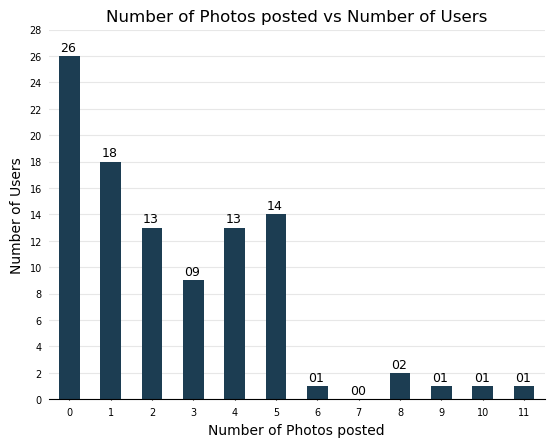

In [11]:
ax=df2a['cnt'].value_counts().sort_index(ascending=True).reindex(range(12), fill_value=0).plot.bar(rot=0, xlabel="Number of Photos posted", ylabel="Number of Users", title="Number of Photos posted vs Number of Users", color='#1c3d52')

for r in ax.patches:
    ax.annotate(f"{int(r.get_height()):02}", xy=(r.get_x()+0.03, r.get_y()+r.get_height()+0.37), rotation=0, size=9)
    
ax.tick_params(axis='x', pad=5, length=1, labelsize=7)
ax.set_yticks(list(range(0,30, 2)))
ax.tick_params(axis='y', pad=5, length=0, labelsize=7)

ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)

# The axis lines from top, left and right are removed
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
plt.show()

> * From the above plot, we can observe that there are **26** number of users who have never posted in Instagram. 
> * Also, most users have posted **5 or less than 5** number of photos while very few users have posted **more than 5** number of photos.

### A3. Your Task: Identify the winner of the contest and provide their details to the team

In [12]:
query1='select max(totals) from (select photo_id as p, count(photo_id) as totals from likes group by photo_id) as r'
query2='select photo_id, count(photo_id) as c from likes group by photo_id having count(photo_id) = ({})'.format(query1)
query3='select p.user_id as pui, s.photo_id as spi, s.c as cnt from photos as p join ({}) as s on p.id=s.photo_id'.format(query2)
query4='select u.id, u.username, t.spi as photo_id, t.cnt as max_count from users as u join ({}) as t on u.id=t.pui'.format(query3)
df4 = pd.read_sql_query(query4, conn)

In [13]:
df4

,id,username,photo_id,max_count
0,52,Zack_Kemmer93,145,48


> * The above dataframe shows that User with username **Zack_Kemmer93** has posted a Photo with Photo ID **145** has got the most likes **(48)**

In [14]:
query='select u.id, u.username, l.photo_id, count(l.photo_id) as likes_count from users u join photos p on u.id=p.user_id join likes l on p.id=l.photo_id group by l.photo_id order by likes_count desc limit 10'
df4a = pd.read_sql_query(query, conn)

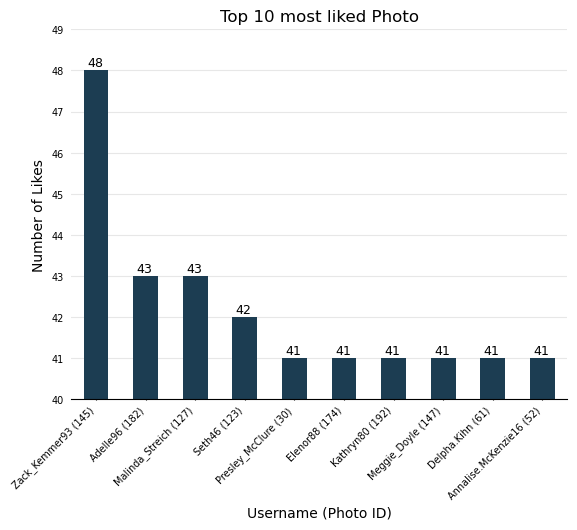

In [15]:
ax=df4a['likes_count'].plot.bar(ylim=(40,49), rot=45, xlabel="Username (Photo ID)", ylabel="Number of Likes", title="Top 10 most liked Photo", color='#1c3d52')

for r in ax.patches:
    ax.annotate(f"{int(r.get_height())}", xy=(r.get_x()+0.07, r.get_y()+r.get_height()+0.1), rotation=0, size=9)
    
x_tck=['{} ({})'.format(df4a['username'].values[i], df4a['photo_id'].values[i]) for i in range(10)]
    
ax.set_xticks(ticks=list(range(0,10)), labels=x_tck, ha='right')
ax.tick_params(axis='x', pad=3, length=1, labelsize=7)
ax.set_yticks(list(range(40,50)))
ax.tick_params(axis='y', pad=5, length=0, labelsize=7)

ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)

# The axis lines from top, left and right are removed
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

plt.show()

> * The above plot supports our finding in above observations that User with username **ZackKemmer93** who posted a phot with Photo ID **145** has got the most likes.
> * The plot also shows that all the **top 10 most liked** Photos have more than **40** likes.

### A4. Your Task: Identify and suggest the top 5 most commonly used hashtags on the platform

In [16]:
query1='select tag_id, count(tag_id) as cnt from photo_tags group by tag_id order by cnt desc limit 5'
query2='select t.id, t.tag_name from tags as t join({}) as s on t.id=s.tag_id'.format(query1)
df5 = pd.read_sql_query(query2, conn)

In [17]:
df5

,id,tag_name
0,21,smile
1,20,beach
2,17,party
3,13,fun
4,18,concert


> * From the above dataframe, we can observe that most commonly used hashtags are **smile**, **beach**, **party**, **fun** and **concert**.

In [18]:
query1='select tag_id, count(tag_id) as cnt from photo_tags group by tag_id order by cnt desc'
query2='select t.tag_name, s.cnt from tags as t join({}) as s on t.id=s.tag_id order by s.cnt desc'.format(query1)
df5a = pd.read_sql_query(query2, conn)

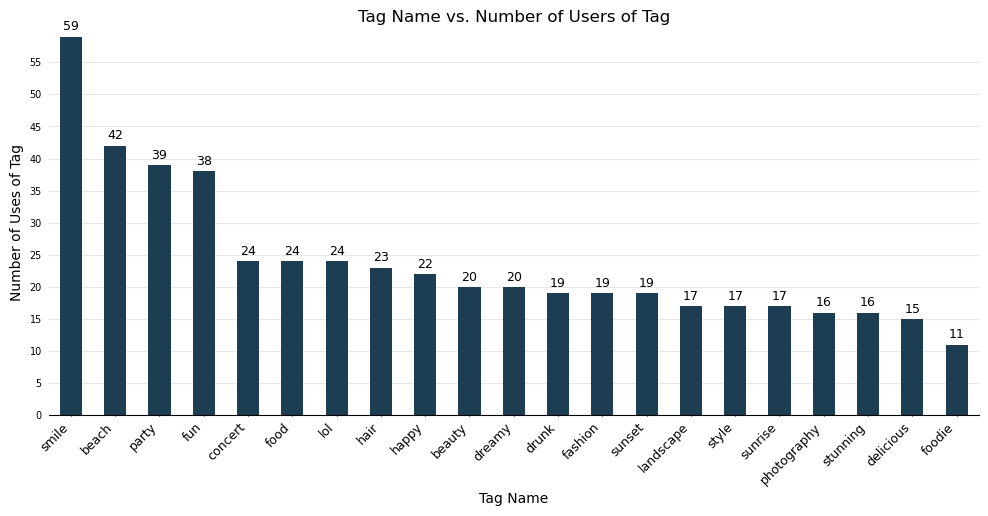

In [19]:
plt.figure(figsize=(12,5))
ax=df5a['cnt'].plot.bar(ylim=(0,60), rot=0, xlabel="Tag Name", ylabel="Number of Uses of Tag", title="Tag Name vs. Number of Users of Tag", color='#1c3d52')

for r in ax.patches:
    ax.annotate(f"{int(r.get_height())}", xy=(r.get_x()+0.07, r.get_y()+r.get_height()+1), rotation=0, size=9)
    
ax.set_xticks(ticks=list(range(0,21)), labels=list(df5a['tag_name'].values), ha='right')
ax.tick_params(axis='x', pad=3, length=1, labelsize=9, rotation=45)
ax.set_yticks(list(range(0,60,5)))
ax.tick_params(axis='y', pad=5, length=0, labelsize=7)

ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)

# The axis lines from top, left and right are removed
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

plt.show()

### A5. Your Task: What day of the week do most users register on? Provide insights on when to schedule an ad campaign

In [20]:
query1='select dayname(created_at) as dn from users'
query2='select dn as Day_Name, count(dn) as Count from ({}) as q1 group by q1.dn order by Count desc'.format(query1)
df6 = pd.read_sql_query(query2, conn)

In [21]:
df6

,Day_Name,Count
0,Thursday,16
1,Sunday,16
2,Friday,15
3,Tuesday,14
4,Monday,14
5,Wednesday,13
6,Saturday,12


> * From the above dataframe, we can observe that most users registered on **Thursday** and **Sunday**.

In [22]:
query='select monthname(created_at) as monthOfYear, dayname(created_at) as dayOfWeek, hour(created_at) as hourOfDay from users'
df6a = pd.read_sql_query(query, conn)

In [23]:
d1=df6a['monthOfYear'].value_counts().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
d2=df6a['dayOfWeek'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
d3=df6a['hourOfDay'].value_counts().sort_index(ascending=True).reindex(range(24), fill_value=0)

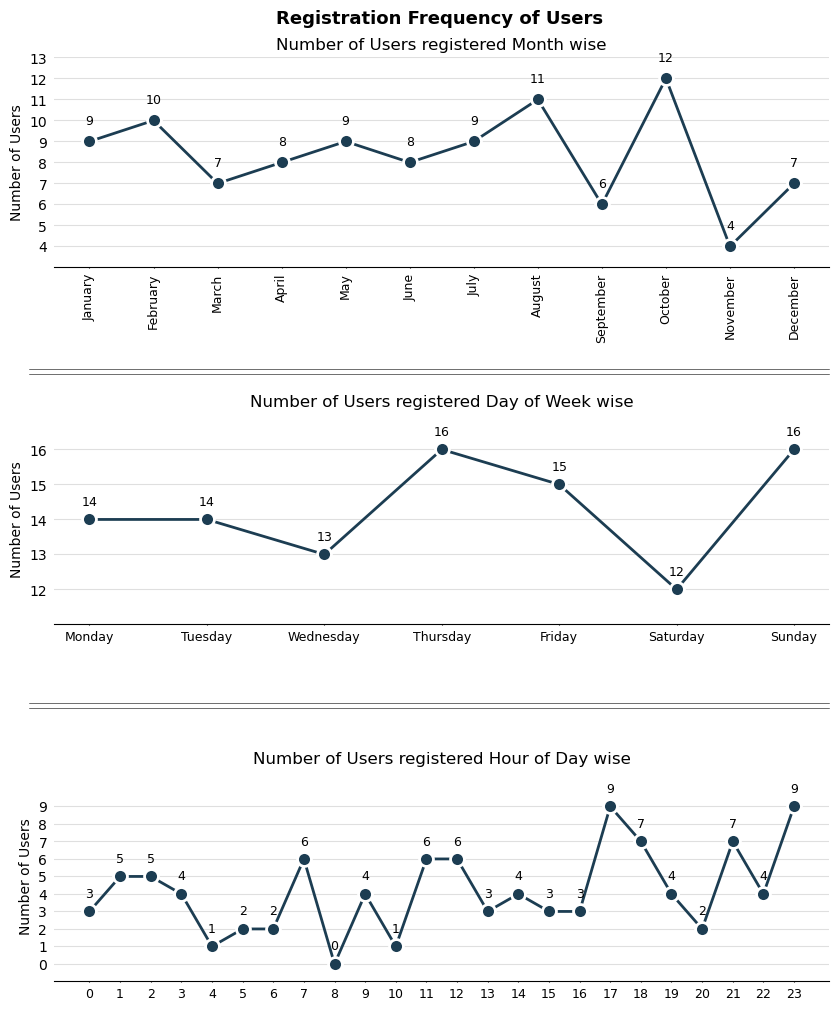

In [24]:
fig, ax=plt.subplots(3,1,figsize=(10,12))

ax[0].plot(d1.index, d1.values, linewidth=2, markersize=10, marker='o', markerfacecolor='#1c3d52', color='#1c3d52', markeredgecolor='white', markeredgewidth=2)

for i in enumerate(d1.values):
    ax[0].annotate(f"{i[1]}", xy=(i[0], i[1]+1), ha='center', va='center', fontfamily='sans-serif', fontsize=9)
    
ax[0].tick_params(axis='x', pad=3, length=1, labelsize=9, rotation=90)
ax[0].set_ylim(3, 13)
ax[0].set_yticks(list(range(4,14)))
ax[0].tick_params(axis='y', pad=5, length=0)

# The axis lines from top, left, right and bottom are removed
for s in ['top', 'right', 'left']:#, 'bottom']:
    ax[0].spines[s].set_visible(False)

ax[0].set_title("Number of Users registered Month wise")
ax[0].set_ylabel("Number of Users")

ax[0].grid(axis='y', alpha=0.4)
ax[0].set_axisbelow(True)

#========================================================================================================================
#========================================================================================================================

ax[1].plot(d2.index, d2.values, linewidth=2, markersize=10, marker='o', markerfacecolor='#1c3d52', color='#1c3d52', markeredgecolor='white', markeredgewidth=2)

for i in enumerate(d2.values):
    ax[1].annotate(f"{i[1]}", xy=(i[0], i[1]+0.5), ha='center', va='center', fontfamily='sans-serif', fontsize=9)
    
ax[1].tick_params(axis='x', pad=3, length=1, labelsize=9)
ax[1].set_ylim(11,17)
ax[1].set_yticks(list(range(12,17)))
ax[1].tick_params(axis='y', pad=5, length=0)

# The axis lines from top, left, right and bottom are removed
for s in ['top', 'right', 'left']:#, 'bottom']:
    ax[1].spines[s].set_visible(False)

ax[1].set_title("Number of Users registered Day of Week wise")
ax[1].set_ylabel("Number of Users")

ax[1].grid(axis='y', alpha=0.4)
ax[1].set_axisbelow(True)

#========================================================================================================================
#========================================================================================================================

ax[2].plot(d3.index, d3.values, linewidth=2, markersize=10, marker='o', markerfacecolor='#1c3d52', color='#1c3d52', markeredgecolor='white', markeredgewidth=2)

for i in enumerate(d3.values):
    ax[2].annotate(f"{i[1]}", xy=(i[0], i[1]+1), ha='center', va='center', fontfamily='sans-serif', fontsize=9)

ax[2].set_xticks(list(range(0,24)))
ax[2].tick_params(axis='x', pad=3, length=1, labelsize=9)
ax[2].set_ylim(-1,11)
ax[2].set_yticks(list(range(0,10)))
ax[2].tick_params(axis='y', pad=5, length=0)

# The axis lines from top, left, right and bottom are removed
for s in ['top', 'right', 'left']:
    ax[2].spines[s].set_visible(False)

ax[2].set_title("Number of Users registered Hour of Day wise")
ax[2].set_ylabel("Number of Users")

ax[2].grid(axis='y', alpha=0.4)
ax[2].set_axisbelow(True)

#========================================================================================================================
#========================================================================================================================

l1 = lines.Line2D([0.1, 0.9], [0.616, 0.616], transform=fig.transFigure, figure=fig, color='black',lw=0.4)
l2 = lines.Line2D([0.1, 0.9], [0.620, 0.620], transform=fig.transFigure, figure=fig, color='black',lw=0.4)
l3 = lines.Line2D([0.1, 0.9], [0.338, 0.338], transform=fig.transFigure, figure=fig, color='black',lw=0.4)
l4 = lines.Line2D([0.1, 0.9], [0.342, 0.342], transform=fig.transFigure, figure=fig, color='black',lw=0.4)
fig.lines.extend([l1, l2, l3, l4])

fig.subplots_adjust(hspace=0.7)
fig.suptitle("Registration Frequency of Users", x=0.51, y=0.92, fontsize=13, fontweight=600)

plt.show()

> * If the Marketing team is looking at **Months**, then the best Month to schedule an Ad Campaign is the month of **October** followed by **August** and the **February**.
> * If the Marketing team is looking at **Days of Week**, then the best Days of a Week to schedule an Ad Campaign are **Thursday** and **Sunday**.
> * If the Marketing team is looking at **Hours of Day**, then the best Hours of a Day to schedule an Ad Campaign are **17th Hour (5 P.M)** and **23rd Hour (11 P.M)**. We didn't find any particular trend while observing Number of Users registered Hour of Day wise.

In [25]:
df_thurs=df6a[df6a['dayOfWeek']=='Thursday']
d4=df_thurs['monthOfYear'].value_counts().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], fill_value=0)
d5=df_thurs['hourOfDay'].value_counts().sort_index(ascending=True).reindex(range(24), fill_value=0)

df_sun=df6a[df6a['dayOfWeek']=='Sunday']
d6=df_sun['monthOfYear'].value_counts().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], fill_value=0)
d7=df_sun['hourOfDay'].value_counts().sort_index(ascending=True).reindex(range(24), fill_value=0)

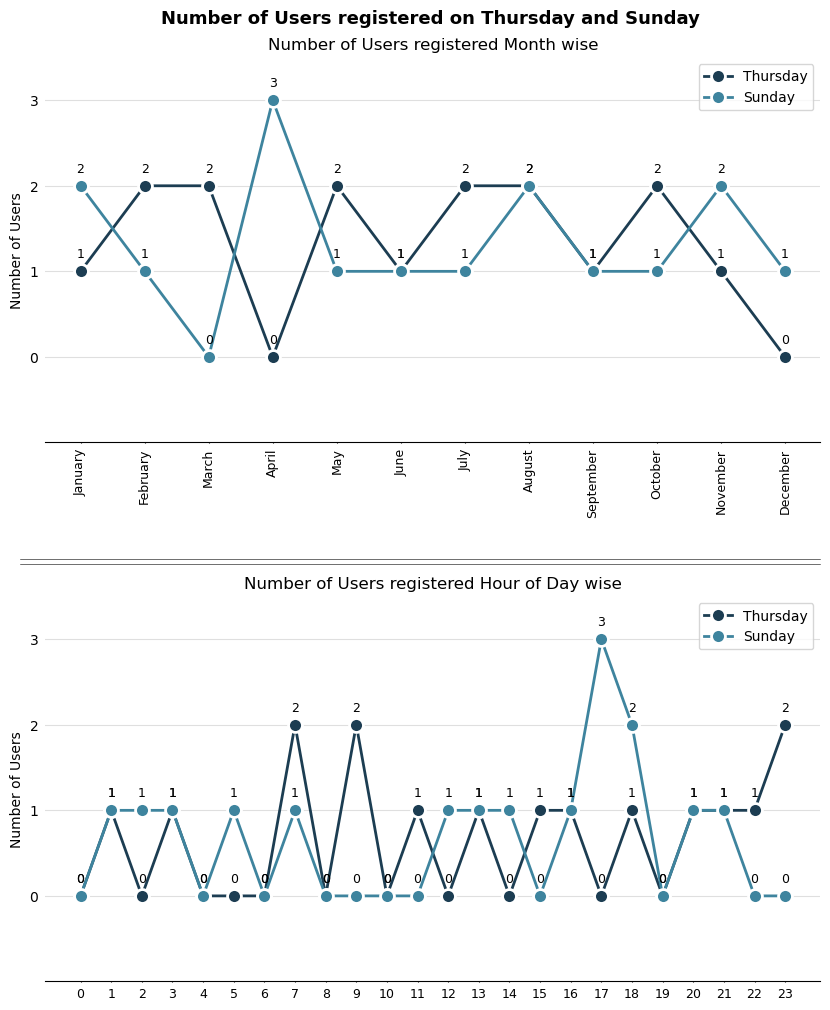

In [26]:
fig, ax=plt.subplots(2,1,figsize=(10,12))

ax[0].plot(d4.index, d4.values, linewidth=2, markersize=10, marker='o', markerfacecolor='#1c3d52', color='#1c3d52', markeredgecolor='white', markeredgewidth=2)
ax[0].plot(d6.index, d6.values, linewidth=2, markersize=10, marker='o', markerfacecolor='#3e849e', color='#3e849e', markeredgecolor='white', markeredgewidth=2)
ax[0].legend(['Thursday', 'Sunday'], loc='upper right')

for i in enumerate(d4.values):
    ax[0].annotate(f"{i[1]}", xy=(i[0], i[1]+0.2), ha='center', va='center', fontfamily='sans-serif', fontsize=9)
    
for i in enumerate(d6.values):
    ax[0].annotate(f"{i[1]}", xy=(i[0], i[1]+0.2), ha='center', va='center', fontfamily='sans-serif', fontsize=9)
    
ax[0].tick_params(axis='x', pad=3, length=1, labelsize=9, rotation=90)
ax[0].set_ylim(-1, 3.5)
ax[0].set_yticks(list(range(0,4)))
ax[0].tick_params(axis='y', pad=5, length=0)

# The axis lines from top, left, right and bottom are removed
for s in ['top', 'right', 'left']:
    ax[0].spines[s].set_visible(False)

ax[0].set_title("Number of Users registered Month wise")
ax[0].set_ylabel("Number of Users")

ax[0].grid(axis='y', alpha=0.4)
ax[0].set_axisbelow(True)

#========================================================================================================================
#========================================================================================================================

ax[1].plot(d5.index, d5.values, linewidth=2, markersize=10, marker='o', markerfacecolor='#1c3d52', color='#1c3d52', markeredgecolor='white', markeredgewidth=2)
ax[1].plot(d7.index, d7.values, linewidth=2, markersize=10, marker='o', markerfacecolor='#3e849e', color='#3e849e', markeredgecolor='white', markeredgewidth=2)
ax[1].legend(['Thursday', 'Sunday'], loc='upper right')

for i in enumerate(d5.values):
    ax[1].annotate(f"{i[1]}", xy=(i[0], i[1]+0.2), ha='center', va='center', fontfamily='sans-serif', fontsize=9)
    
for i in enumerate(d7.values):
    ax[1].annotate(f"{i[1]}", xy=(i[0], i[1]+0.2), ha='center', va='center', fontfamily='sans-serif', fontsize=9)
    
ax[1].set_xticks(list(range(0,24)))
ax[1].tick_params(axis='x', pad=3, length=1, labelsize=9)
ax[1].set_ylim(-1,3.5)
ax[1].set_yticks(list(range(0,4)))
ax[1].tick_params(axis='y', pad=5, length=0)

# The axis lines from top, left, right and bottom are removed
for s in ['top', 'right', 'left']:#, 'bottom']:
    ax[1].spines[s].set_visible(False)

ax[1].set_title("Number of Users registered Hour of Day wise")
ax[1].set_ylabel("Number of Users")

ax[1].grid(axis='y', alpha=0.4)
ax[1].set_axisbelow(True)

#========================================================================================================================
#========================================================================================================================

l1 = lines.Line2D([0.1, 0.9], [0.458, 0.458], transform=fig.transFigure, figure=fig, color='black',lw=0.4)
l2 = lines.Line2D([0.1, 0.9], [0.462, 0.462], transform=fig.transFigure, figure=fig, color='black',lw=0.4)
fig.lines.extend([l1, l2])

fig.subplots_adjust(hspace=0.4)
fig.suptitle("Number of Users registered on Thursday and Sunday", x=0.51, y=0.92, fontsize=13, fontweight=600)

plt.show()

> * For **Thursday**, we could not find any trend while observing **"Number of Users registered Month wise"** plot. We also could not find any trend while observing **"Number of Users registered Hour of Day wise"** plot.
> * For **Sunday**, there was no particular trend but the month of **April** showed highest number of User registrations. Also, there was no particular trend but the **17th Hour(5 P.M)** showed highest number of User registrations.
> * More data could have helped us in observing any important trends from the plots.
> * Thus, from the limited data we have, we can say that the best Month to schedule an Ad Campaign are **Sundays** of **April** and the best Hours to schedule an Ad Campaign are **17th Hour(5 P.M)** of **Sundays**.

### B1. Your Task: Provide how many times does average user posts on Instagram. Also, provide the total number of photos on Instagram/total number of users

In [27]:
query1='select u.id as uid_in_ig, p.user_id as uid_ph_pst from users u left join photos p on u.id=p.user_id'
query2='select count(q1.uid_ph_pst) as cnt from ({}) as q1 group by q1.uid_in_ig'.format(query1)
query3='select avg(cnt) from ({}) as q2'.format(query2)
df7 = pd.read_sql_query(query3, conn)

In [28]:
df7

,avg(cnt)
0,2.57


In [29]:
query4='select count(q1.uid_ph_pst)/count(distinct q1.uid_in_ig) as no_ph_by_no_users from ({}) as q1'.format(query1)
df8 = pd.read_sql_query(query4, conn)

In [30]:
df8

,no_ph_by_no_users
0,2.57


### B2. Your Task: Provide data on users (bots) who have liked every single photo on the site (since any normal user would not be able to do this).

In [31]:
query1='select user_id, count(user_id) as cnt from likes group by user_id'
query2='select q1.user_id, u.username, q1.cnt from ({}) as q1 join users as u on q1.user_id=u.id where q1.cnt=all(select count(id) from photos)'.format(query1)
df9 = pd.read_sql_query(query2, conn)

In [32]:
df9

,user_id,username,cnt
0,5,Aniya_Hackett,257
1,14,Jaclyn81,257
2,21,Rocio33,257
3,24,Maxwell.Halvorson,257
4,36,Ollie_Ledner37,257
5,41,Mckenna17,257
6,54,Duane60,257
7,57,Julien_Schmidt,257
8,66,Mike.Auer39,257
9,71,Nia_Haag,257
